In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
metrics = pd.read_csv("combined-metrics.csv")
metrics

,Name,h1,h2,N1,N2,vocabulary,length,volume,difficulty,effort,...,TNM,TNOS,TNPKG,TCLOC,TNDI,WarningBlocker,WarningCritical,WarningMajor,WarningMinor,WarningInfo
0,ART,5.426254,37.780236,29.793510,54.132743,43.206490,83.926254,584.412444,3.788608,6123.228869,...,4344,45583,160,39251,163,0,3344,1814,15850,0
1,BentoML,2.027322,9.528689,6.375683,12.117486,11.556011,18.493169,104.179158,1.249032,673.525078,...,2491,15924,290,7413,293,0,1565,922,2645,0
2,Bokeh,1.679878,11.704878,8.170732,15.144512,13.384756,23.315244,138.803874,1.076430,565.625418,...,6243,33119,422,44318,425,0,2869,2791,11479,0
3,Camel,2.110599,9.350230,6.188940,11.857143,11.460829,18.046083,89.496891,1.352121,427.190000,...,682,4713,65,5795,68,0,389,158,314,0
4,CatBoost,1.767325,17.382161,14.407392,26.279517,19.149487,40.686910,317.482364,1.276134,4268.967052,...,2489,20577,4175,5824,4178,0,641,1216,8203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,TPOT,1.910256,15.128205,9.833333,18.294872,17.038462,28.128205,198.343327,1.179885,1757.200688,...,386,2956,30,3033,33,0,55,708,588,0
97,Transformers,6.231448,51.356326,46.403727,81.881661,57.587774,128.285387,937.797984,4.779816,12474.980316,...,45298,395313,736,236770,739,0,36038,21123,113238,0
98,TTS,4.291985,24.148855,18.723282,34.759542,28.440840,53.482824,357.637226,2.980252,3864.628958,...,2728,23564,143,16580,146,0,3136,382,6436,0
99,vit-pytorch,9.157895,37.701754,29.684211,53.175439,46.859649,82.859649,484.281414,6.460772,3907.880711,...,669,3881,5,437,8,0,341,178,1388,0


In [69]:
metrics.columns

Index(['Name', 'h1', 'h2', 'N1', 'N2', 'vocabulary', 'length', 'volume',
       'difficulty', 'effort', 'time', 'bugs', 'MI', 'CC', 'CCL', 'CCO', 'CEE',
       'CI', 'LDC', 'LLDC', 'CLLC', 'CLC', 'NCR', 'CR', 'CEG', 'TLLOC', 'TLOC',
       'TNCL', 'TNFI', 'TNM', 'TNOS', 'TNPKG', 'TCLOC', 'TNDI',
       'WarningBlocker', 'WarningCritical', 'WarningMajor', 'WarningMinor',
       'WarningInfo'],
      dtype='object')

In [66]:
# sometimes SourceMeter fails to calculate some metrics. Check that we managed to fix all such cases
for i, row in metrics.iterrows():
    if (row == "__INVALID__").any():
        print(f"{row[0]} has invalid metrics")

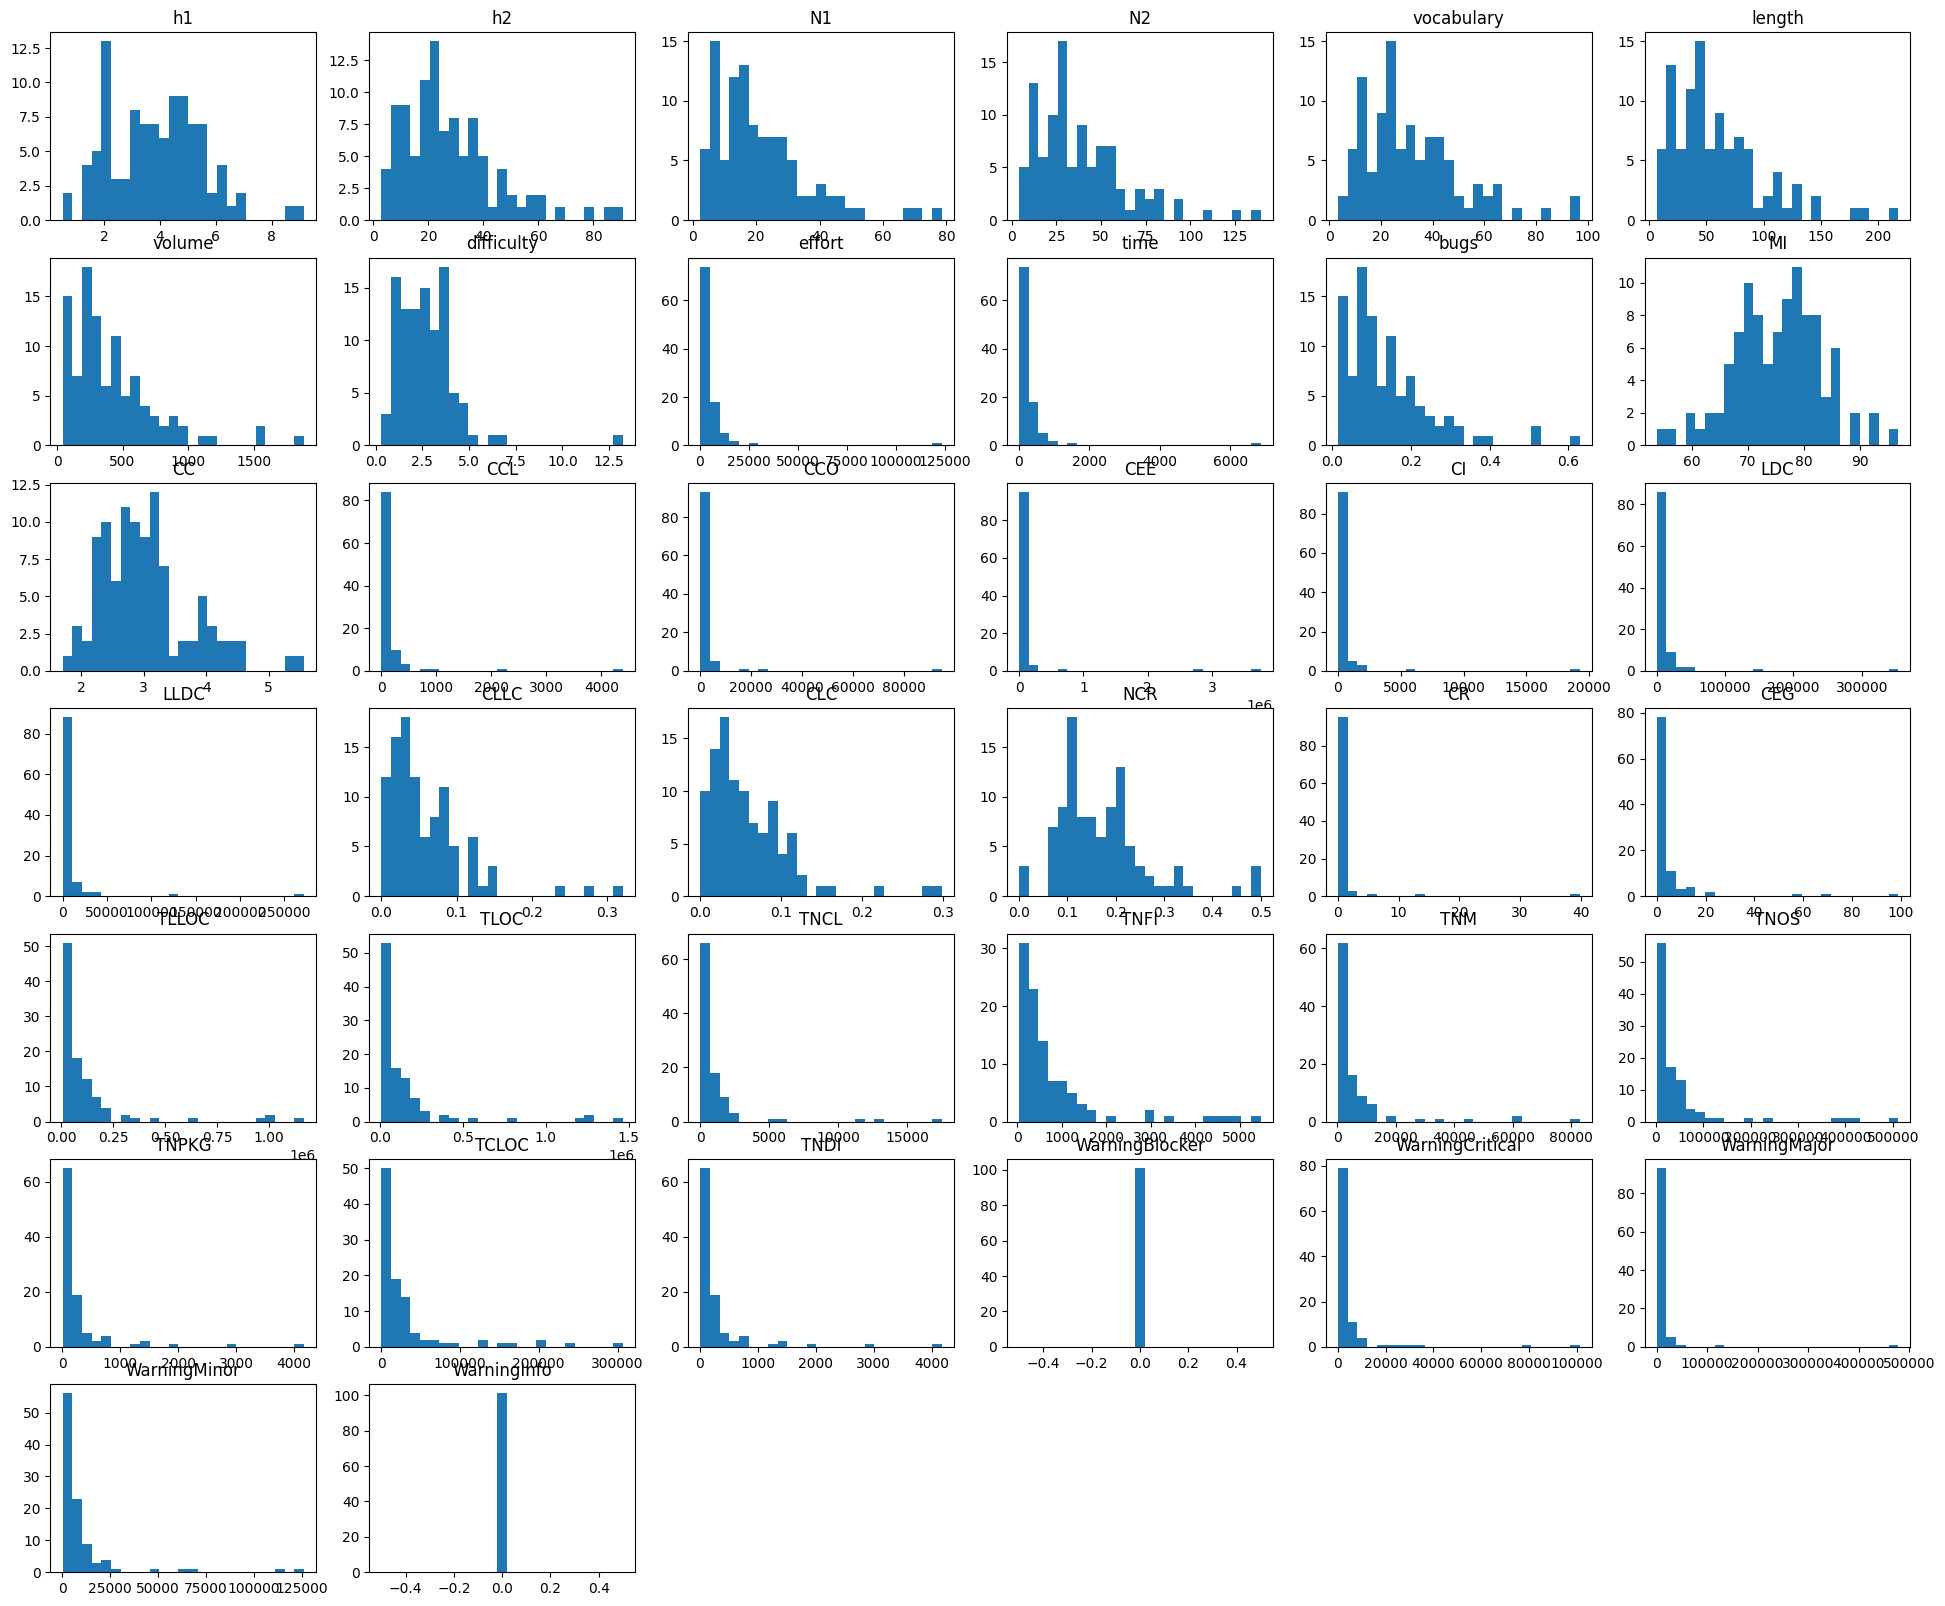

In [71]:
plt.figure(figsize=(24, 20))
for i, name in enumerate(metrics.drop(columns=["Name"])):
    plt.subplot(7, 6, i + 1)
    plt.title(name)
    plt.hist(metrics[name], bins=25)
plt.show()

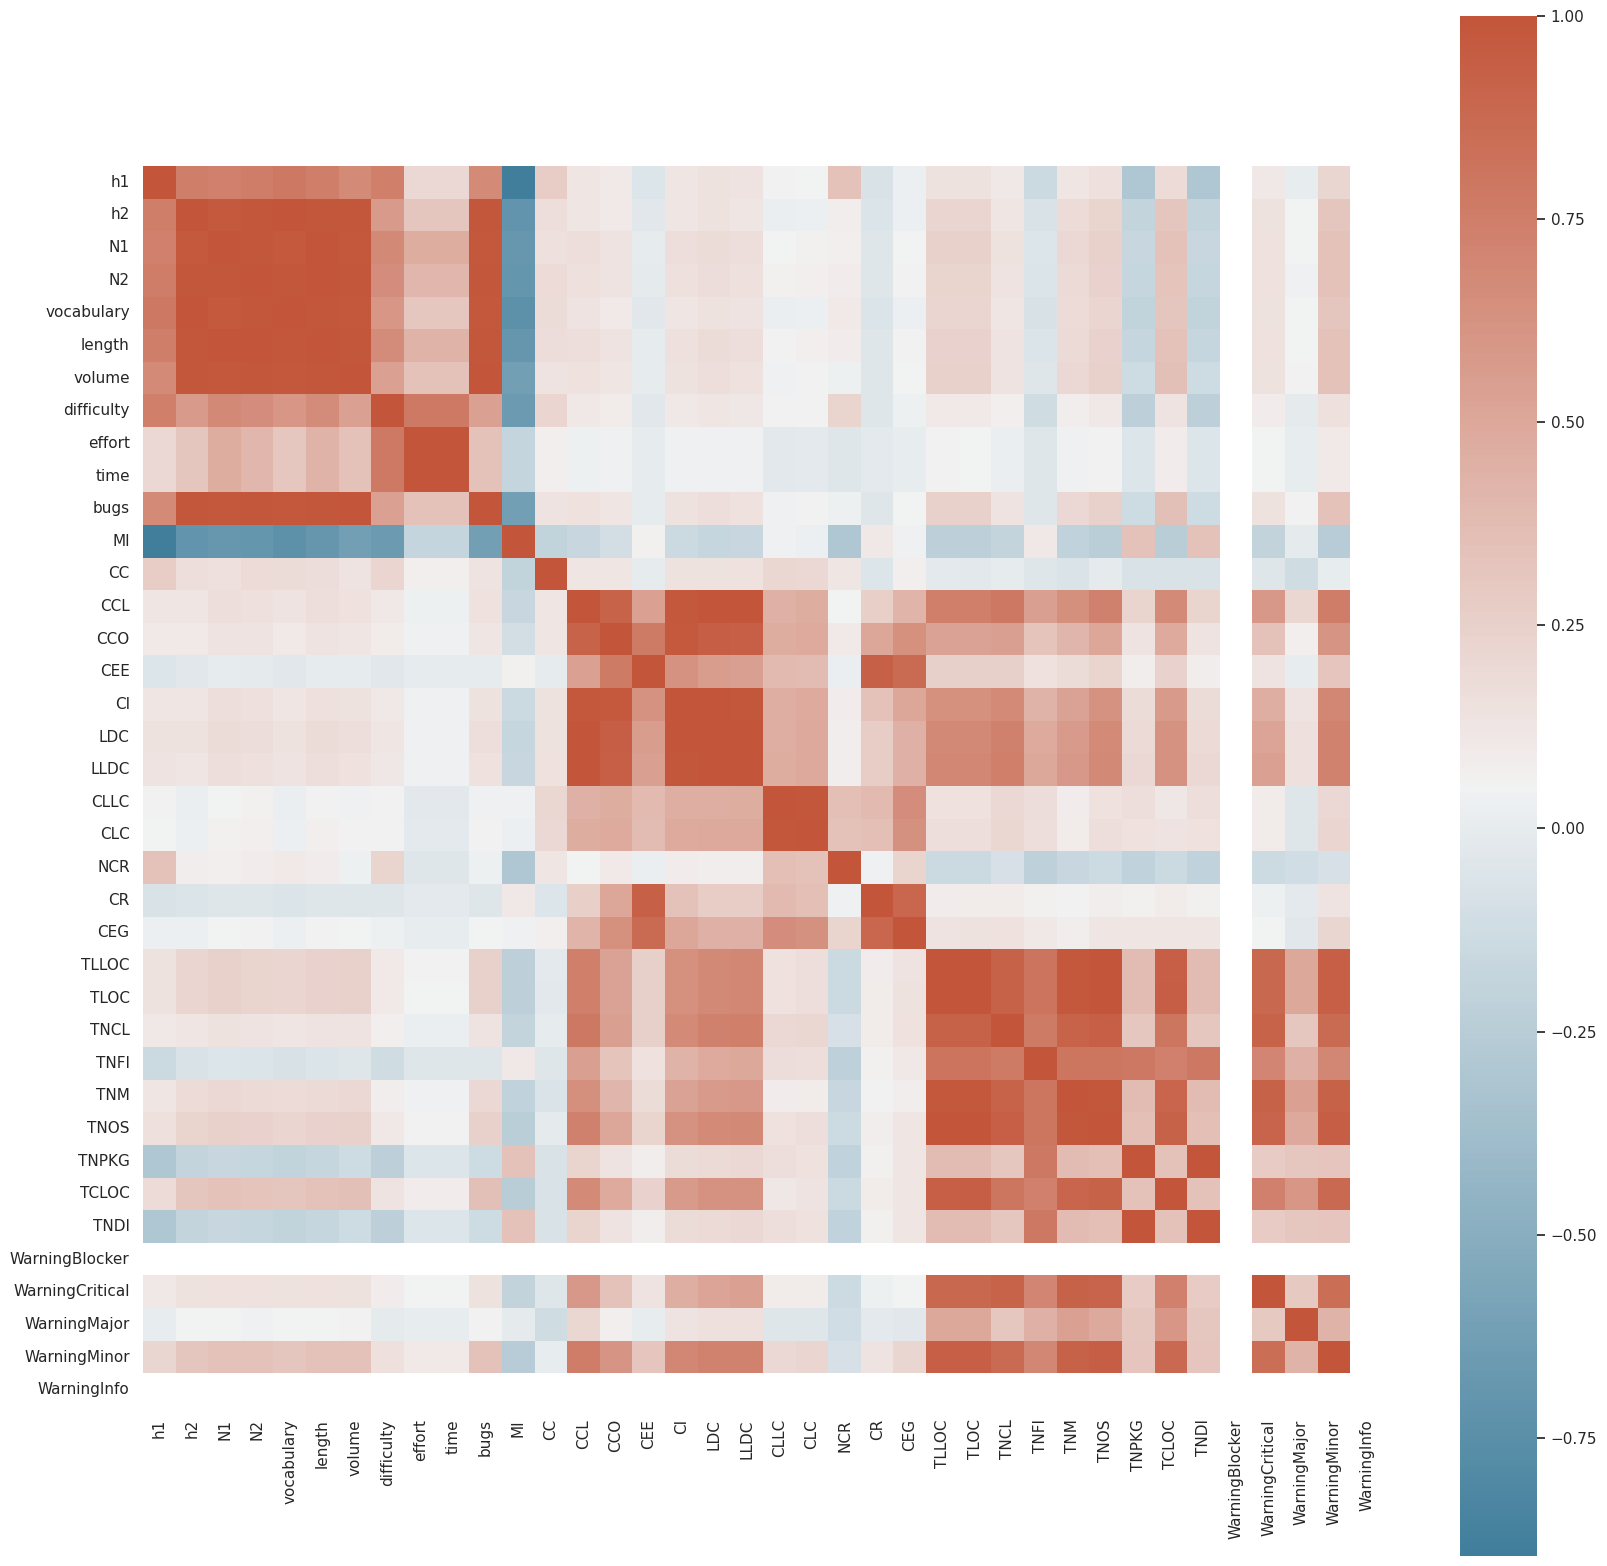

In [78]:
import seaborn as sns

corr = metrics.drop(columns=["Name"]).corr()

plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, cmap=cmap)
plt.show()